In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
f1 = '/home/mehul/Documents/training/python/data/daily-total-female-births.csv'

In [3]:
d1 = pd.read_csv(f1, parse_dates=['Date'], index_col=0)
d1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


<Figure size 1152x360 with 0 Axes>

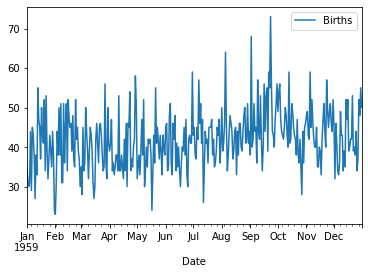

In [4]:
plt.figure(figsize=(16,5))
d1.plot()
plt.show()

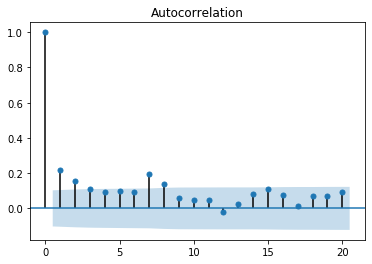

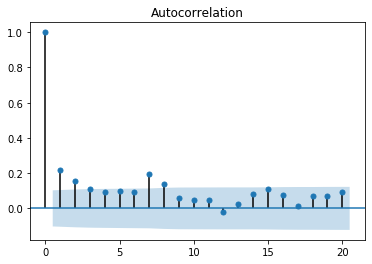

In [5]:
plot_acf(d1.Births, lags=20)

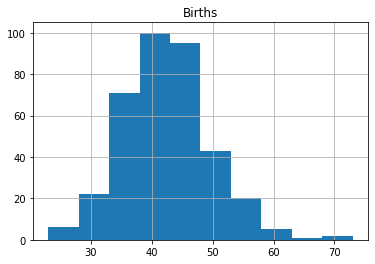

In [6]:
d1.hist()
plt.show()

In [7]:
values = d1.values
partition = round(len(values) / 2)
s1, s2 = values[:partition], values[partition:]

In [8]:
print(s1.mean(), s1.std())
print(s2.mean(), s2.std())

39.76373626373626 7.015227025275623
44.185792349726775 6.979158301807611


# Augmented dickey fuller test
# Ho - Time series is not stationary
# Ha - Time series is stationary

# p > 0.05 - Fail to reject the Ho. Means, the series is non stationary
# p <= 0.05 - Reject the Ho. Means, the series is stationary

In [13]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(d1.Births)
result

(-4.808291253559764,
 5.2434129901498554e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [9]:
file_path = '/home/mehul/Documents/training/python/data/airline-passengers.csv'

In [10]:
df = pd.read_csv(file_path, parse_dates=['Month'], index_col=0)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [18]:
from numpy import log

In [19]:
df['Passengers'] = log(df['Passengers'])

In [20]:
df

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


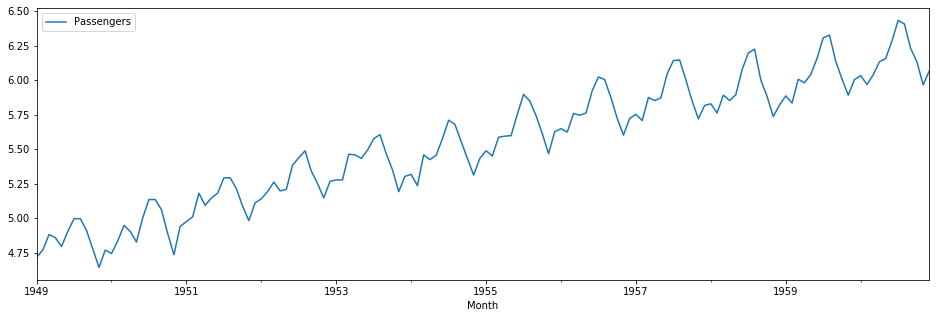

In [21]:
df.plot(figsize=(16,5))
plt.show()

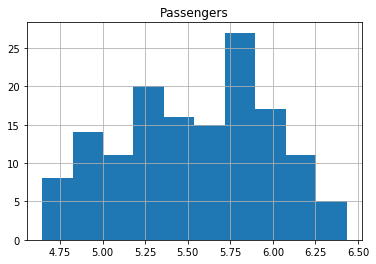

In [22]:
df.hist()
plt.show()

In [23]:
values = df.values
partition = round(len(values) / 2)
s1, s2 = values[:partition], values[partition:]

In [24]:
print(s1.mean(), s1.std())
print(s2.mean(), s2.std())

5.17514614000377 0.2614858710244744
5.909205777059973 0.2219553868604685


In [25]:
result = adfuller(df.Passengers)
result

(-1.7170170891069714,
 0.4223667747703857,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)